In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from entot.data.data import create_gaussians, create_gaussian_split
from entot.models.models import DiscreteOTModel, SeguyModel
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp

In [2]:
n_x = 100
n_y = 100
x = np.linspace(-0.3, 1.2, n_x)
y = np.linspace(-0.5, 0.5, n_y)
xx, yy = np.meshgrid(x,y)

x_fl = xx.flatten()
y_fl = yy.flatten()

concat = jnp.transpose(jnp.concatenate((jnp.atleast_2d(x_fl), jnp.atleast_2d(y_fl)), axis=0))
concat.shape

(10000, 2)

# Dataset 1

In [3]:
source, target = create_gaussians(1000, 1000, var_source=0.2, var_target=0.2)

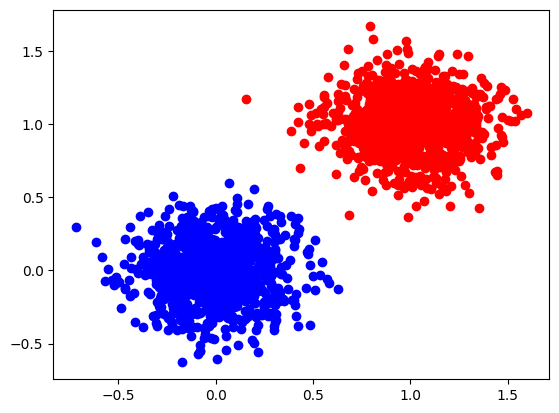

In [4]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")

In [5]:
dot = DiscreteOTModel(epsilon=1e-3)
dot(source, target)
dot_transported = dot.transport()

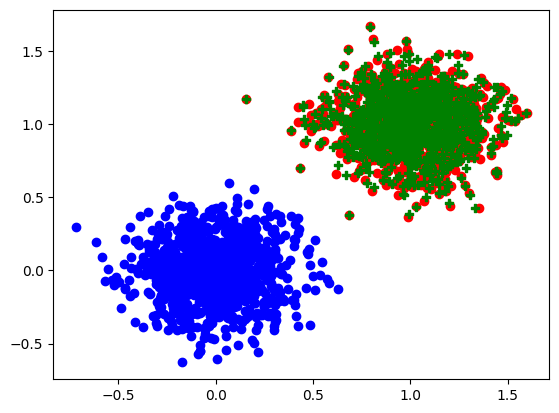

In [6]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.scatter(dot_transported[:, 0], dot_transported[:, 1], color="green", marker="P")

In [7]:
hessian_source = dot.get_hessians_f(source)

In [8]:
traces = jnp.trace(hessian_source, axis1=1, axis2=2)
sizes = jnp.maximum(traces, 0.5)
erroneous = np.asarray(traces < 0)

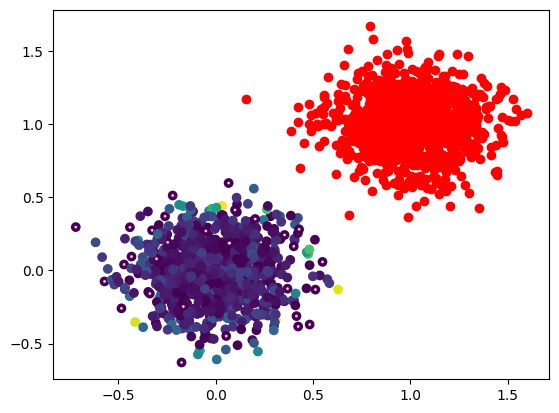

In [9]:
plt.scatter(source[:,0], source[:,1], c=sizes)
plt.scatter(source[:,0], source[:,1], color="pink", s=np.asarray(erroneous).astype(float))
plt.scatter(target[:, 0], target[:, 1], color="red")

In [10]:
dot.output.f.mean(), dot.output.g.mean()

(Array(0.9518135, dtype=float32), Array(1.0881099, dtype=float32))

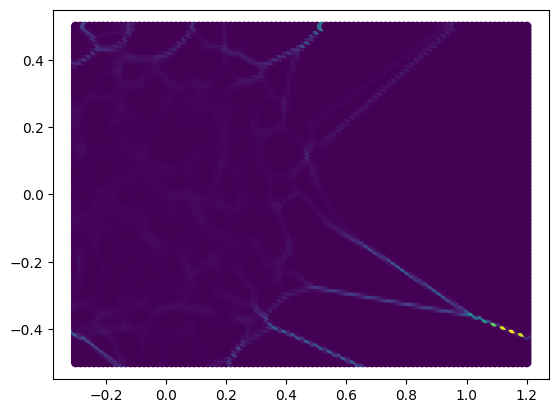

In [11]:
hessian_f = dot.get_hessians_f(concat)

traces = jnp.trace(hessian_f, axis1=1, axis2=2)
sizes = jnp.maximum(traces, 0.5)
erroneous = np.asarray(traces < 0)#.astype(float)

plt.scatter(concat[:,0], concat[:,1], c=sizes)

# Dataset 2

In [44]:
source, target = create_gaussian_split(1000, 900, var_source=0.04, var_target=0.04, seed=1)

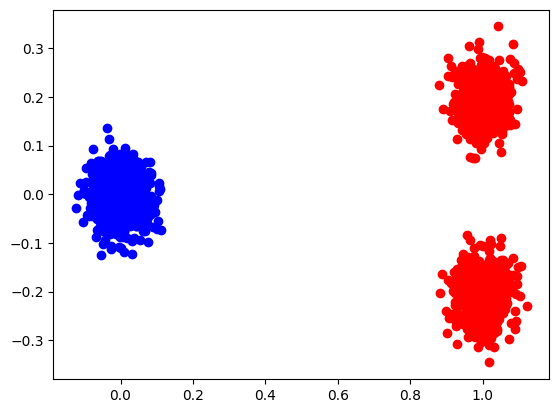

In [45]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")

In [46]:
dot = DiscreteOTModel(epsilon=1e-3)
dot(source, target)
dot_transported = dot.transport()

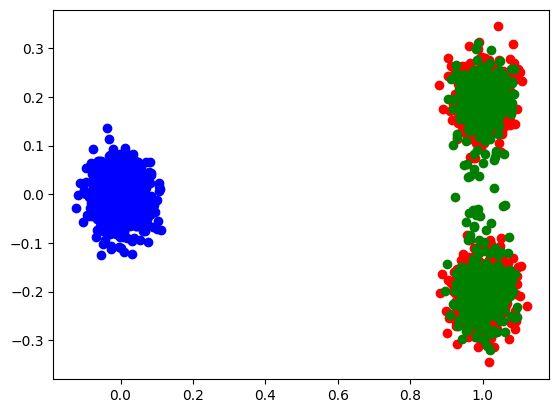

In [47]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.scatter(dot_transported[:, 0], dot_transported[:, 1], color="green")

In [48]:
hessian_source = dot.get_hessians_f(source)

In [60]:
traces = jnp.trace(hessian_source, axis1=1, axis2=2)
sizes = jnp.maximum(traces, 0.5)
erroneous = np.asarray(traces < 0)#.astype(float)
erroneous.sum()

0

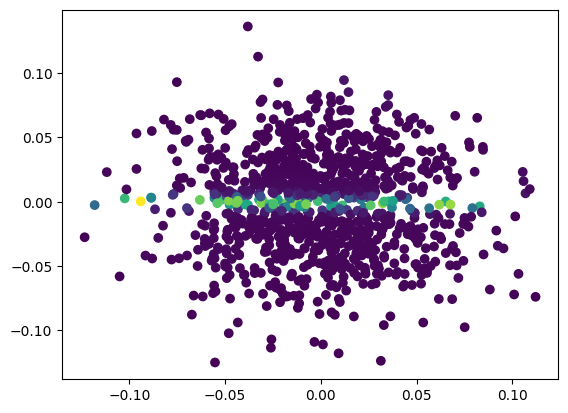

In [50]:
plt.scatter(source[:,0], source[:,1], c=sizes)
plt.scatter(source[:,0], source[:,1], color="pink", s=np.asarray(erroneous).astype(float))
#plt.scatter(target[:, 0], target[:, 1], color="red")

In [51]:
hessian_f = dot.get_hessians_f(concat)

In [52]:
traces = jnp.trace(hessian_f, axis1=1, axis2=2)
sizes = jnp.maximum(traces, 0.5)
erroneous = np.asarray(traces < 0)#.astype(float)

In [53]:
sizes.max(), sizes.min()

(Array(211.19069, dtype=float32), Array(0.5, dtype=float32))

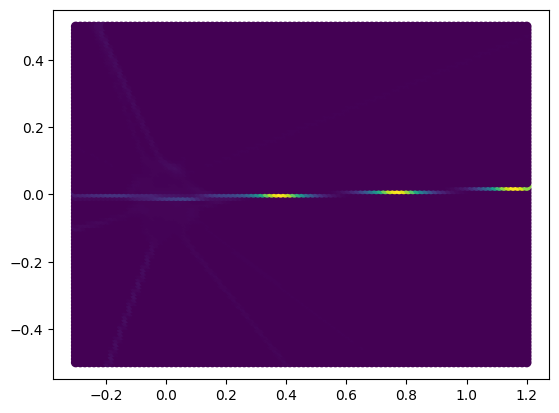

In [54]:
plt.scatter(concat[:,0], concat[:,1], c=sizes)


In [55]:
var_1 = jnp.trace(hessian_f, axis1=1, axis2=2)
sizes = jnp.maximum(traces, 0.5)
erroneous = np.asarray(traces < 0)#.astype(float)

In [56]:
hessian_f.shape

(10000, 2, 2)

In [57]:
hessian_f[:, 0, 0].shape

(10000,)

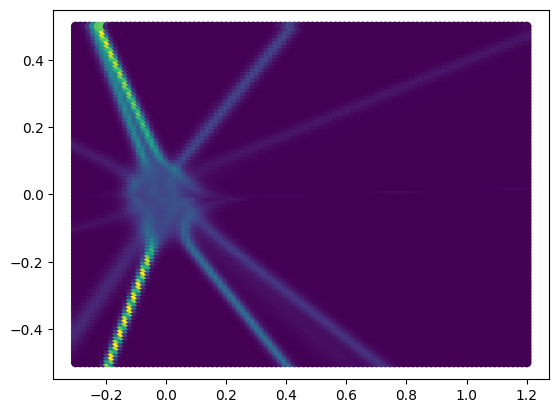

In [58]:
plt.scatter(concat[:,0], concat[:,1], c=hessian_f[:, 0, 0])

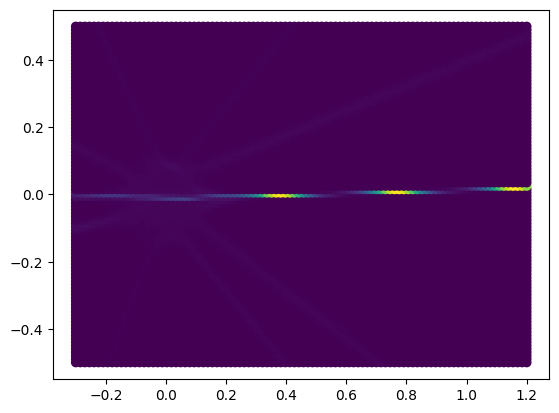

In [59]:
plt.scatter(concat[:,0], concat[:,1], c=hessian_f[:, 1, 1])